In [51]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt



from programs.utils import levenshtein


In [52]:
lvl_3 = pd.read_csv('datafiles/analyses/name_variants/matches_links_exact_lvl_3.csv', sep="|", index_col=False)
lvl_3.columns = ['edit_distance', 'id_1', 'target_name_1', 'target_name_2', 'target_name_3', 'target_name_4', 'id_2', 'candidate_name_1', 'candidate_name_2', 'candidate_name_3', 'candidate_name_4']
lvl_4 = pd.read_csv('datafiles/analyses/name_variants/matches_links_exact_lvl_4.csv', sep='|', index_col=False)
lvl_4.columns = ['edit_distance', 'id_1', 'target_name_1', 'target_name_2', 'target_name_3', 'target_name_4', 'id_2', 'candidate_name_1', 'candidate_name_2', 'candidate_name_3', 'candidate_name_4']
lvl_4 = lvl_4.fillna(" ")
lvl_5 = pd.read_csv('datafiles/analyses/name_variants/matches_links_exact_lvl_5.csv', sep='|', index_col=False)
lvl_5.columns = ['edit_distance', 'id_1', 'target_name_1', 'target_name_2', 'target_name_3', 'target_name_4', 'id_2', 'candidate_name_1', 'candidate_name_2', 'candidate_name_3', 'candidate_name_4']
lvl_5 = lvl_5.fillna(" ")

In [53]:
def label_edit_distance_3(row):
    groups = ['1,1,1', '1,2', '3']
    count_ones = 0
    for header in ['dist_name_1', 'dist_name_2', 'dist_name_3', 'dist_name_4']:
        if row[header] == 1:
            count_ones += 1
        if row[header] == 2:
            return groups[1]
        if row[header] == 3:
            return groups[2]
    if count_ones == 3:
        return groups[0]
    
    
def label_edit_distance_4(row):
    groups = ['1,1,1,1', '1,1,2', '2,2', '1,3', '4']
    count_ones = 0
    count_twos = 0
    for header in ['dist_name_1', 'dist_name_2', 'dist_name_3', 'dist_name_4']:
        if row[header] == 1:
            count_ones += 1
        if row[header] == 2:
            count_twos += 1
        if row[header] == 4:
            return groups[4]
    if count_ones == 4:
        return groups[0]
    if count_ones == 2 and count_twos == 1:
        return groups[1]
    if count_twos == 2:
        return groups[2]
    if count_ones == 1:
        return groups[3]
    
    
def label_edit_distance_5(row):
    groups = ['1,1,1,1,1', '1,1,1,2', '1,2,2', '1,1,3', '2,3', '1,4', '5']
    count_ones = 0
    count_twos = 0
    count_threes = 0
    count_fours = 0
    for header in ['dist_name_1', 'dist_name_2', 'dist_name_3', 'dist_name_4']:
        if row[header] == 1:
            count_ones += 1
        if row[header] == 2:
            count_twos += 1
        if row[header] == 3:
            count_threes += 1
        if row[header] == 4:
            count_fours += 1
        if row[header] == 5:
            return groups[6]
    if count_ones == 5:
        return groups[0]
    if count_ones == 3:
        return groups[1]
    if count_ones == 1:
        if count_twos == 2:
            return groups[2]
        elif count_fours == 1:
            return groups[5]
    if count_ones == 2 and count_threes == 1:
        return groups[3]
    if count_twos == 1 and count_threes == 1:
        return groups[4]


In [54]:
def get_levenshtein(row):
    return [levenshtein.levenshtein(row['target_name_'+str(i)], row['candidate_name_'+str(i)]) for i in xrange(1,5)]

In [55]:
lvl_3['dist_name_1'], lvl_3['dist_name_2'], lvl_3['dist_name_3'], lvl_3['dist_name_4'] = zip(*lvl_3.apply(get_levenshtein, axis=1))

In [56]:
lvl_3_exact = lvl_3[lvl_3.edit_distance == 0]

In [57]:
lvl_3_not_exact = lvl_3[lvl_3.edit_distance > 0]

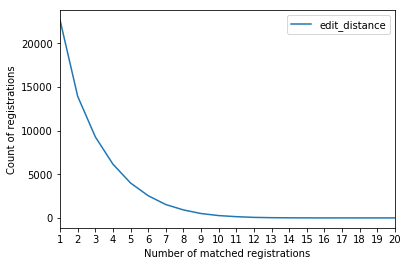

In [101]:
count_matches_per_registration = lvl_3_exact[['id_1', 'edit_distance', 'id_2']].groupby("id_1").count().groupby('id_2').count()
x_max = count_matches_per_registration.index.max() + 1
x_ticks = [x for x in xrange(1, x_max)]
ax = count_matches_per_registration.plot(xticks=x_ticks)
ax.set_ylabel("Count of registrations")
ax.set_xlabel("Number of matched registrations")
plt.show()

In [59]:
lvl_3_not_exact

,edit_distance,id_1,target_name_1,target_name_2,target_name_3,target_name_4,id_2,candidate_name_1,candidate_name_2,candidate_name_3,candidate_name_4,dist_name_1,dist_name_2,dist_name_3,dist_name_4
5,3,847018,jacobus,dieleman,maria,deij,792357,jacobus,dieleman,maria,ee,0,0,0,3
14,3,888495,johannes,wit,jozina,reems,734439,johannes,wit,jozina,ee,0,0,0,3
18,1,796899,jacob,cambier,maria,hal,768477,jakob,cambier,maria,hal,1,0,0,0
19,1,796899,jacob,cambier,maria,hal,818242,jakob,cambier,maria,hal,1,0,0,0
20,3,863039,emanuel,smidt,sara,halle,878644,emanuel,smedt,sara,hal,0,1,0,2
21,2,863039,emanuel,smidt,sara,halle,703536,emanuel,smidt,sara,hal,0,0,0,2
22,2,863039,emanuel,smidt,sara,halle,718028,emanuel,smidt,sara,hal,0,0,0,2
24,2,798468,anthonie,guerand,pieternella,hal,783475,anthonie,geurand,pieternella,hal,0,2,0,0
28,1,784965,klaas,groen,joanna,hall,716567,klaas,groen,johanna,hall,0,0,1,0
29,1,736193,christiaan,baas,joanna,hall,840623,christiaan,baas,johanna,hall,0,0,1,0


In [83]:
def count_zeros(row):
    return np.count_nonzero(row[['dist_name_' + str(x) for x in xrange(1,5)]]) == 1

In [94]:
lvl_3_not_exact["All_errors_in_one_name"] = lvl_3_not_exact.apply(count_zeros, axis=1)


e:\Anaconda2\envs\bachelorscriptie\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [132]:
extra_options = lvl_3_not_exact[lvl_3_not_exact.All_errors_in_one_name]

In [133]:
label_map = {
    0: 'vnm',
    1: 'fnm',
    2: 'vnv',
    3: 'fnv'
}
def label_name(row, label_map):
    
    name_list = list(row[['dist_name_' + str(i) for i in range(1,5)]])
    for i in range(len(name_list)):
        if name_list[i] != 0:
            return label_map[i]
    
    

In [134]:
extra_options[:10].apply(label_name, axis=1, args=(label_map,))

5     fnv
14    fnv
18    vnm
19    vnm
21    fnv
22    fnv
24    fnm
28    vnv
29    vnv
30    vnv
dtype: object

In [135]:
extra_options['name_label'] = lvl_3_not_exact.apply(label_name, axis=1, args=(label_map,))

e:\Anaconda2\envs\bachelorscriptie\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [136]:
extra_options

,edit_distance,id_1,target_name_1,target_name_2,target_name_3,target_name_4,id_2,candidate_name_1,candidate_name_2,candidate_name_3,candidate_name_4,dist_name_1,dist_name_2,dist_name_3,dist_name_4,All_errors_in_one_name,name_label
5,3,847018,jacobus,dieleman,maria,deij,792357,jacobus,dieleman,maria,ee,0,0,0,3,True,fnv
14,3,888495,johannes,wit,jozina,reems,734439,johannes,wit,jozina,ee,0,0,0,3,True,fnv
18,1,796899,jacob,cambier,maria,hal,768477,jakob,cambier,maria,hal,1,0,0,0,True,vnm
19,1,796899,jacob,cambier,maria,hal,818242,jakob,cambier,maria,hal,1,0,0,0,True,vnm
21,2,863039,emanuel,smidt,sara,halle,703536,emanuel,smidt,sara,hal,0,0,0,2,True,fnv
22,2,863039,emanuel,smidt,sara,halle,718028,emanuel,smidt,sara,hal,0,0,0,2,True,fnv
24,2,798468,anthonie,guerand,pieternella,hal,783475,anthonie,geurand,pieternella,hal,0,2,0,0,True,fnm
28,1,784965,klaas,groen,joanna,hall,716567,klaas,groen,johanna,hall,0,0,1,0,True,vnv
29,1,736193,christiaan,baas,joanna,hall,840623,christiaan,baas,johanna,hall,0,0,1,0,True,vnv
30,1,736193,christiaan,baas,joanna,hall,869147,christiaan,baas,johanna,hall,0,0,1,0,True,vnv


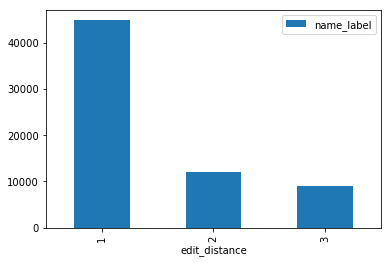

In [142]:
extra_options[['edit_distance', 'name_label']].groupby('edit_distance').count().plot(kind='bar')
plt.show()